<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/DWDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
df = pd.read_csv('Info.csv',index_col=0)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
print('Original Messy Data:\n')
print(df)

print('\nDropping Duplicates records:\n')
# Step 3: Drop duplicates
df.drop_duplicates(inplace=True)
print(df)

print('\nHandling Missing Values:\n')
# Step 4: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Department'] = df['Department'].fillna('Unknown')
print(df.head())

print('\nEncoding categorical variables:\n')
# Step 5: Encode categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Female=0, Male=1

df = pd.get_dummies(df, columns=['Department'], drop_first=True)
print(df.head())

print('\nNormalizing numerical columns:\n')
# Step 6: Normalize numerical columns
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
print(df.head())

print("\nCleaned and Preprocessed Data (Shape: {}):\n".format(df.shape), df.head())

			---Lab Report of Nirjala Pandey(28200/078)---
Original Messy Data:

            Age  Gender   Salary Department
Name                                       
John       29.0    Male  50000.0      Sales
NaN        34.0  Female      NaN  Marketing
Alice       NaN       F  54000.0  marketing
B0b        27.0       m      NaN      Sales
Anna       28.0  Female  58000.0      Sales
George     40.0    Male      NaN      Sales
susan      31.0  FEMALE  49000.0        NaN
Micheal    45.0       M      NaN        NaN
Rachel      NaN       F  62000.0        NaN
Tom        33.0    Male  58000.0        NaN
NaN         NaN    Male  51000.0  Marketing
jenny      26.0     NaN  55000.0      Sales
Chris      29.0    male      NaN  Marketing
  Robert   37.0    Male  61000.0  Marketing
Linda      29.0  Female  53000.0      Sales
NaN        30.0  Female      NaN  Marketing
Eli        25.0    Male  46000.0  Marketing
Katie       NaN       f  59000.0  marketing
steve      29.0    Male  57000.0      Sales
Julie

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset: Transactions
dataset = [
    ['milk', 'bread', 'butter', 'eggs'],
    ['milk', 'bread', 'butter'],
    ['milk', 'butter', 'eggs'],
    ['bread', 'butter', 'eggs'],
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread', 'butter', 'eggs']
]

# Convert to dataframe
from mlxtend.preprocessing import TransactionEncoder
transact = TransactionEncoder()
te_ary = transact.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=transact.columns_)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
print("Transactional Data:")
print(df)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

			---Lab Report of Nirjala Pandey(28200/078)---
Transactional Data:
   bread  butter   eggs   milk
0   True    True   True   True
1   True    True  False   True
2  False    True   True   True
3   True    True   True  False
4   True   False   True   True
5   True    True   True   True

Frequent Itemsets:
    support         itemsets
0  0.833333          (bread)
1  0.833333         (butter)
2  0.833333           (eggs)
3  0.833333           (milk)
4  0.666667  (butter, bread)
5  0.666667    (eggs, bread)
6  0.666667    (bread, milk)
7  0.666667   (butter, eggs)
8  0.666667   (butter, milk)
9  0.666667     (eggs, milk)

Association Rules:
   antecedents consequents   support  confidence  lift
0     (butter)     (bread)  0.666667         0.8  0.96
1      (bread)    (butter)  0.666667         0.8  0.96
2       (eggs)     (bread)  0.666667         0.8  0.96
3      (bread)      (eggs)  0.666667         0.8  0.96
4      (bread)      (milk)  0.666667         0.8  0.96
5       (milk)     (bread

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


# Sample dataset: Transactions
dataset = [
    ['milk', 'bread', 'butter', 'eggs'],
    ['milk', 'bread', 'butter'],
    ['milk', 'butter', 'eggs'],
    ['bread', 'butter', 'eggs'],
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread', 'butter', 'eggs']
]

# Convert to dataframe with one-hot encoding
transact = TransactionEncoder()
transact_array = transact.fit_transform(dataset)
df = pd.DataFrame(transact_array, columns=transact.columns_)

print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
print("Transactional Data:")
print(df)

# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)

print("\nFrequent Itemsets (support ≥ 0.6):")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


			---Lab Report of Nirjala Pandey(28200/078)---
Transactional Data:
   bread  butter   eggs   milk
0   True    True   True   True
1   True    True  False   True
2  False    True   True   True
3   True    True   True  False
4   True   False   True   True
5   True    True   True   True

Frequent Itemsets (support ≥ 0.6):
    support         itemsets
0  0.833333           (milk)
1  0.833333           (eggs)
2  0.833333         (butter)
3  0.833333          (bread)
4  0.666667     (eggs, milk)
5  0.666667   (butter, eggs)
6  0.666667   (butter, milk)
7  0.666667  (butter, bread)
8  0.666667    (eggs, bread)
9  0.666667    (bread, milk)

Association Rules:
   antecedents consequents   support  confidence  lift
0       (eggs)      (milk)  0.666667         0.8  0.96
1       (milk)      (eggs)  0.666667         0.8  0.96
2     (butter)      (eggs)  0.666667         0.8  0.96
3       (eggs)    (butter)  0.666667         0.8  0.96
4     (butter)      (milk)  0.666667         0.8  0.96
5       (

			---Lab Report of Nirjala Pandey(28200/078)---


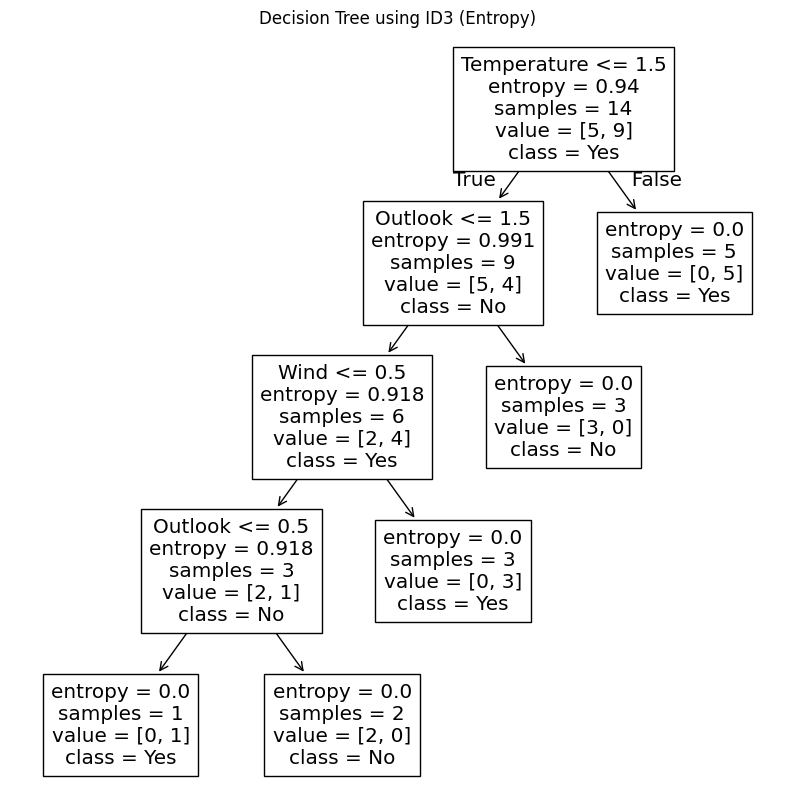


Prediction for sample input: No


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split features and target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Train Decision Tree using ID3 (entropy)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Show decision tree
plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=False)
plt.title("Decision Tree using ID3 (Entropy)")
plt.show()

# Predict example
sample_data = [[2, 1, 0, 0]]  # Outlook=Sunny, Temperature=Hot, Humidity=High, Wind=Weak
sample_df = pd.DataFrame(sample_data, columns=X.columns)
predicted = model.predict(sample_df)
print("\nPrediction for sample input:", "Yes" if predicted[0] == 1 else "No")

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical data
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Sample prediction
sample_data = [[2, 1, 0, 0]]  # Outlook=Sunny, Temperature=Hot, Humidity=High, Wind=Weak
sample_df = pd.DataFrame(sample_data, columns=X.columns)
prediction = model.predict(sample_df)
print("\nPrediction for sample input:", "Yes" if prediction[0] == 1 else "No")

			---Lab Report of Nirjala Pandey(28200/078)---

Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Accuracy: 0.6666666666666666

Prediction for sample input: No


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Sample Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Label Encoding
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Features and target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SVM Classifier (linear kernel)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Predict a sample input
sample_data = [[2, 1, 0, 0]]  # Outlook=Sunny, Temperature=Hot, Humidity=High, Wind=Weak
sample_df = pd.DataFrame(sample_data, columns=X.columns)
prediction = model.predict(sample_df)
print("\nPrediction for sample input:", "Yes" if prediction[0] == 1 else "No")


			---Lab Report of Nirjala Pandey(28200/078)---

Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Accuracy: 0.3333333333333333

Prediction for sample input: No


			---Lab Report of Nirjala Pandey(28200/078)---
Coefficient (Slope): 0.4855855855855855
Intercept: 0.17567567567567632

Predicted values: [1.63243243 5.03153153]
R2 Score: 0.9969742715688661
Mean Squared Error: 0.009266293320347441


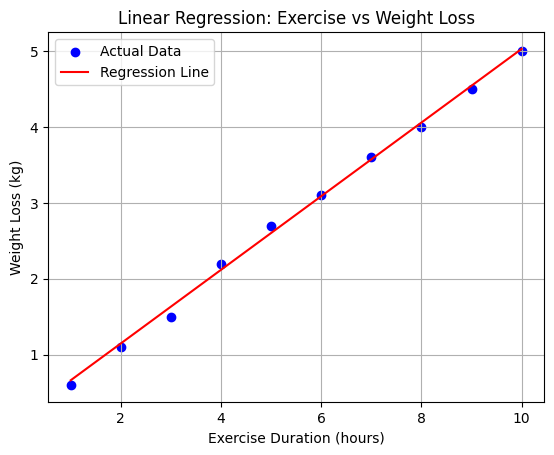


Predicted weight loss for 7.5 hours of exercise: 3.82 kg


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Modified dataset
data = {
    'Exercise_Duration_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Weight_Loss_kg': [0.6, 1.1, 1.5, 2.2, 2.7, 3.1, 3.6, 4.0, 4.5, 5.0]
}
df = pd.DataFrame(data)

# Features and target
X = df[['Exercise_Duration_Hours']]  # 2D array
y = df['Weight_Loss_kg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Output results
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("\nPredicted values:", y_pred)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualize
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Exercise Duration (hours)")
plt.ylabel("Weight Loss (kg)")
plt.title("Linear Regression: Exercise vs Weight Loss")
plt.legend()
plt.grid(True)
plt.show()

# Predict for new value
sample = [[7.5]]  # e.g., 7.5 hours of exercise
sample = pd.DataFrame(sample, columns=X.columns)
predicted_loss = model.predict(sample)
print("\nPredicted weight loss for 7.5 hours of exercise:", round(predicted_loss[0], 2), "kg")

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Updated housing dataset
data = {
    'Flat_Size_sqft':         [400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950],
    'Floor_Level':            [1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
    'Nearby_Amenities_Score': [60, 65, 70, 75, 80, 85, 88, 90, 92, 94, 96, 98],
    'Housing_Price_Lakhs':    [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Flat_Size_sqft', 'Floor_Level', 'Nearby_Amenities_Score']]
y = df['Housing_Price_Lakhs']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Output
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("\nPredicted Housing Prices (Lakhs):", y_pred)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Predict for new input
sample_data = [[725, 4, 88]]  # e.g., 725 sqft, 4th floor, 88 amenities score
sample_df = pd.DataFrame(sample_data, columns=X.columns)
predicted = model.predict(sample_df)
print(f"\nPredicted housing price for input {sample_data[0]}: {round(predicted[0], 2)} Lakhs")

			---Lab Report of Nirjala Pandey(28200/078)---
Coefficients: [ 1.00000000e-01 -5.85608186e-15  5.21709431e-16]
Intercept: -15.000000000000021

Predicted Housing Prices (Lakhs): [35. 40. 45.]
R2 Score: 1.0
Mean Squared Error: 1.0097419586828951e-28

Predicted housing price for input [725, 4, 88]: 57.5 Lakhs


			---Lab Report of Nirjala Pandey(28200/078)---
Cluster Centers:
 [[92.5 82.5]
 [52.5 42.5]
 [35.  25. ]
 [72.5 62.5]]

Clustered Data:
     Annual_Income_kUSD  Spending_Score  Cluster
0                   30              20        2
1                   35              25        2
2                   40              30        2
3                   45              35        1
4                   50              40        1
5                   55              45        1
6                   60              50        1
7                   65              55        3
8                   70              60        3
9                   75              65        3
10                  80              70        3
11                  85              75        0
12                  90              80        0
13                  95              85        0
14                 100              90        0


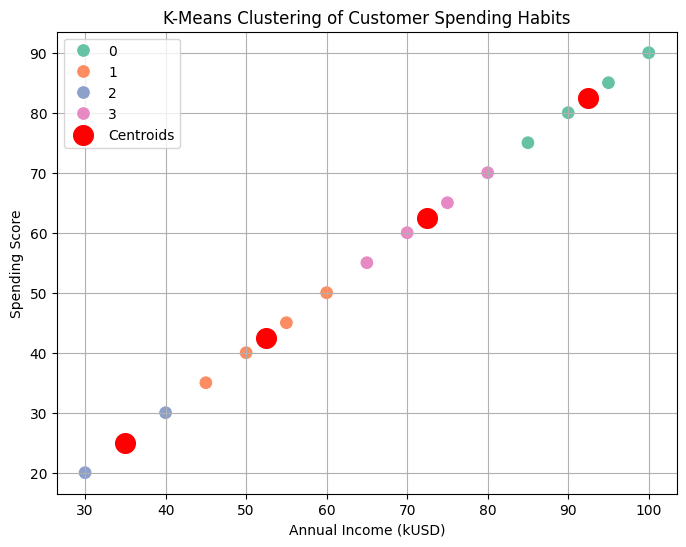

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# New dataset: Customer spending habits
data = {
    'Annual_Income_kUSD': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'Spending_Score': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)

# Apply K-Means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Annual_Income_kUSD', 'Spending_Score']])
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Print assigned cluster labels
print("\nClustered Data:\n", df)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income_kUSD', y='Spending_Score', hue='Cluster', palette='Set2', s=100)
plt.scatter(*kmeans.cluster_centers_.T, c='red', marker='o', s=200, label='Centroids')
plt.title("K-Means Clustering of Customer Spending Habits")
plt.xlabel("Annual Income (kUSD)")
plt.ylabel("Spending Score")
plt.legend()
plt.grid(True)
plt.show()

			---Lab Report of Nirjala Pandey(28200/078)---
Clustered Data:
     Feature1  Feature2  Cluster
0         10        20        0
1         12        25        0
2         15        22        0
3         18        28        0
4         20        30        0
5         30        40        1
6         32        45        1
7         35        42        1
8         38        48        1
9         40        50        1
10        50        60        1
11        52        65        1
12        55        62        1
13        58        68        2
14        60        70        2
15        70        80        2
16        72        85        2
17        75        82        2
18        78        88        2
19        80        90        2

Medoid Points:
     Feature1  Feature2  Cluster
2         15        22        0
9         40        50        1
15        70        80        2


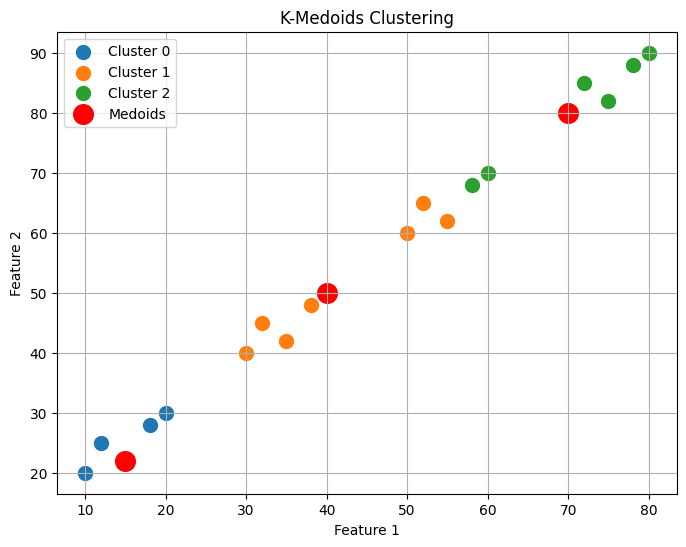

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Updated sample data (20 points)
data = [
    [10, 20], [12, 25], [15, 22], [18, 28], [20, 30],
    [30, 40], [32, 45], [35, 42], [38, 48], [40, 50],
    [50, 60], [52, 65], [55, 62], [58, 68], [60, 70],
    [70, 80], [72, 85], [75, 82], [78, 88], [80, 90]
]

# Choose initial medoid indices (e.g., 3 medoids)
initial_medoids = [0, 7, 14]

# Create and run K-Medoids instance
kmedoids_instance = kmedoids(data, initial_medoids)
kmedoids_instance.process()

# Get clusters and medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Prepare DataFrame for plotting
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Cluster'] = -1  # Initialize

# Assign cluster labels
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        df.loc[index, 'Cluster'] = cluster_id
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Output
print("Clustered Data:\n", df)
print("\nMedoid Points:\n", df.loc[medoids])

# Plot
plt.figure(figsize=(8, 6))
palette = sns.color_palette('Set2', n_colors=len(clusters))

for cluster_id in range(len(clusters)):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'],
                label=f'Cluster {cluster_id}', s=100)

# Highlight medoids
medoid_points = df.loc[medoids]
plt.scatter(medoid_points['Feature1'], medoid_points['Feature2'],
            c='red', marker='o', s=200, label='Medoids')

plt.title("K-Medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

			---Lab Report of Nirjala Pandey(28200/078)---
Cluster Centers:
 [[ 3.28571429 45.80952381]
 [18.2        83.73333333]
 [ 7.73333333 57.        ]
 [12.64516129 69.41935484]]

Clustered Data:
     Years_of_Experience  Skill_Level  Cluster
0                     1           40        0
1                     3           45        0
2                     5           50        0
3                     7           55        2
4                     9           60        2
5                    11           65        3
6                    13           70        3
7                    15           75        3
8                    17           80        1
9                    19           85        1
10                    2           42        0
11                    4           48        0
12                    6           53        2
13                    8           58        2
14                   10           63        2
15                   12           68        3
16                   14 

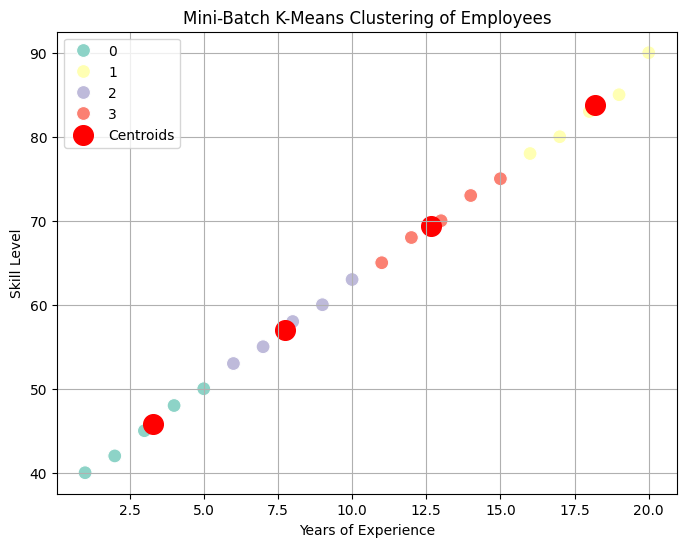

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

# Dataset: Employee experience and skill level
data = {
    'Years_of_Experience': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                            2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Skill_Level': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
                    42, 48, 53, 58, 63, 68, 73, 78, 83, 90]
}

df = pd.DataFrame(data)

# Apply Mini-Batch K-Means clustering
k = 4  # Number of clusters
mb_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=6, n_init=10)
df['Cluster'] = mb_kmeans.fit_predict(df[['Years_of_Experience', 'Skill_Level']])
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
# Print cluster centers
print("Cluster Centers:\n", mb_kmeans.cluster_centers_)

# Print clustered data
print("\nClustered Data:\n", df)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Years_of_Experience', y='Skill_Level',
                hue='Cluster', palette='Set3', s=100)
plt.scatter(mb_kmeans.cluster_centers_[:, 0], mb_kmeans.cluster_centers_[:, 1],
            c='red', marker='o', s=200, label='Centroids')
plt.title("Mini-Batch K-Means Clustering of Employees")
plt.xlabel("Years of Experience")
plt.ylabel("Skill Level")
plt.legend()
plt.grid(True)
plt.show()

			---Lab Report of Nirjala Pandey(28200/078)---

Clustered Data:
     Years_of_Experience  Skill_Level  Cluster
0                     1           40        1
1                     3           45        1
2                     5           50        1
3                     7           55        1
4                     9           60        0
5                    11           65        0
6                    13           70        0
7                    15           75        0
8                    17           80        2
9                    19           85        2
10                    2           42        1
11                    4           48        1
12                    6           53        1
13                    8           58        0
14                   10           63        0
15                   12           68        0
16                   14           73        0
17                   16           78        2
18                   18           83        2
19           

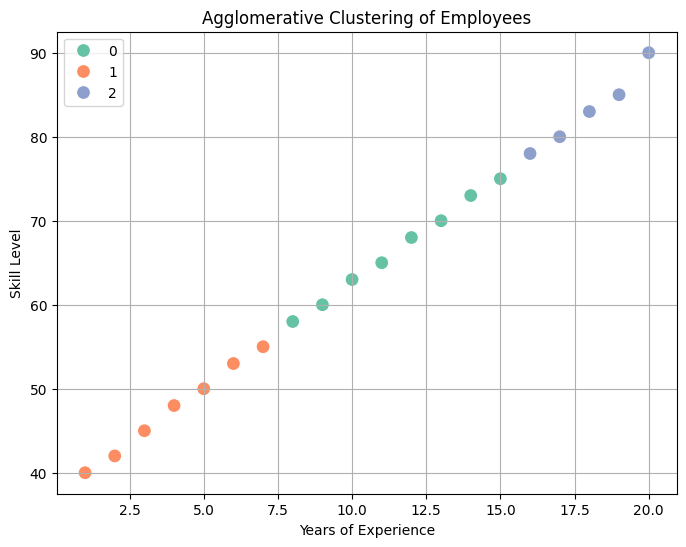

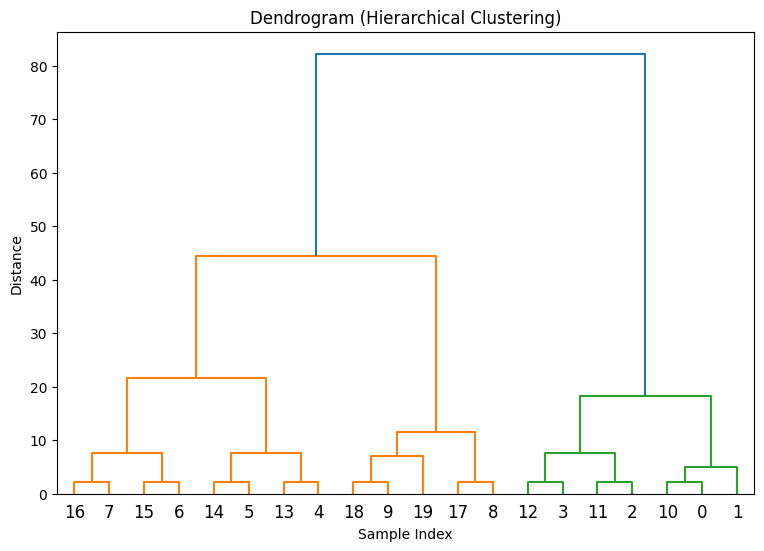

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = {
    'Years_of_Experience': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                            2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Skill_Level': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
                    42, 48, 53, 58, 63, 68, 73, 78, 83, 90]
}

df = pd.DataFrame(data)

# Perform hierarchical/agglomerative clustering
k = 3
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
df['Cluster'] = agg_clustering.fit_predict(df[['Years_of_Experience', 'Skill_Level']])
print('\t\t\t---Lab Report of Nirjala Pandey(28200/078)---')
print("\nClustered Data:\n", df)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Years_of_Experience', y='Skill_Level',
                hue='Cluster', palette='Set2', s=100)
plt.title("Agglomerative Clustering of Employees")
plt.xlabel("Years of Experience")
plt.ylabel("Skill Level")
plt.legend()
plt.grid(True)
plt.show()

# Plot dendrogram
linked = linkage(df[['Years_of_Experience', 'Skill_Level']], method='ward')

plt.figure(figsize=(9, 6))
dendrogram(linked,
           orientation='top',
           labels=df.index.values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

			---Lab Report of Nirjala pandey(28200/078)---

Clustered Data with DBSCAN:
     Years_of_Experience  Skill_Level  Cluster
0                   1.0           40        0
1                   1.5           41        0
2                   2.0           42        0
3                   2.5           43        0
4                   3.0           44        0
5                  10.0           55        1
6                  10.5           56        1
7                  11.0           57        1
8                  11.5           58        1
9                  12.0           59        1
10                 20.0           70        2
11                 20.5           71        2
12                 21.0           72        2
13                 21.5           73        2
14                 22.0           74        2
15                 30.0           85        3
16                 30.5           86        3
17                 31.0           87        3
18                 31.5           88        3
1

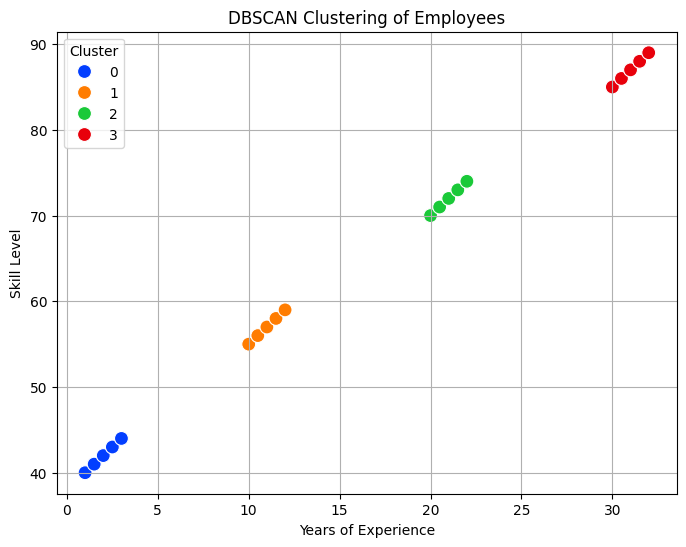

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# New dataset: Employee experience and skill level
data = {
    'Years_of_Experience': [1, 1.5, 2, 2.5, 3,  10, 10.5, 11, 11.5, 12,  20, 20.5, 21, 21.5, 22,  30, 30.5, 31, 31.5, 32],
    'Skill_Level': [40, 41, 42, 43, 44,  55, 56, 57, 58, 59,  70, 71, 72, 73, 74,  85, 86, 87, 88, 89]
}

df = pd.DataFrame(data)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Years_of_Experience', 'Skill_Level']])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
df['Cluster'] = dbscan.fit_predict(scaled_features)
print('\t\t\t---Lab Report of Nirjala pandey(28200/078)---')
print("\nClustered Data with DBSCAN:\n", df)

# Plot clusters
plt.figure(figsize=(8,6))
palette = sns.color_palette('bright', len(set(df['Cluster'])))
sns.scatterplot(data=df, x='Years_of_Experience', y='Skill_Level', hue='Cluster', palette=palette, s=100)

plt.title("DBSCAN Clustering of Employees")
plt.xlabel("Years of Experience")
plt.ylabel("Skill Level")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()